In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

## Explore data

| Feature                    | Description |
|----------------------------|-------------|
| **Pregnancies**            | Number of times the patient has been pregnant. Higher values may indicate a higher risk of diabetes. |
| **Glucose**                | Plasma glucose concentration after 2 hours in an oral glucose tolerance test (OGTT). Higher values may indicate diabetes or insulin resistance. |
| **BloodPressure**          | Diastolic blood pressure (mm Hg). High blood pressure is associated with diabetes-related complications. |
| **SkinThickness**          | Triceps skin fold thickness (mm). Measures subcutaneous fat, which can be an indicator of obesity. |
| **Insulin**                | 2-hour serum insulin level (mu U/ml). Helps assess insulin resistance and diabetes risk. |
| **BMI**                    | Body mass index (BMI), calculated as weight (kg) / height (m)². A high BMI indicates obesity, which is a risk factor for diabetes. |
| **DiabetesPedigreeFunction** | A function that represents the likelihood of diabetes based on family history and genetic factors. |
| **Age**                    | Age of the patient in years. Older individuals have a higher risk of diabetes. |
| **Outcome**                | Target variable (0 or 1), where 1 indicates a diabetes diagnosis, and 0 means no diabetes. There are 268 cases of diabetes in a dataset of 768 patients. |


In [279]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


checking missing values

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


checking duplicated values

In [281]:
df.duplicated().sum()

0

checking the outliers

In [282]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


| **Feature**                  | **Issues** |
|-----------------------------|-----------|
| **BloodPressure**  |  **zero values** |
| **SkinThickness**  |**zero values**|
| **Insulin**  |  **zero values** |
| **BMI**  | **zero values** |
| **Glucose**  | **zero values** |


which is inaccurate based on domain knowledge (Zia 2017, Chang 2022).

minimum values in the glucose, blood pressure, skin thickness, insulin, and BMI attributes have been replaced with their median values.

In [283]:
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_to_replace:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value) 


## handle the outliers

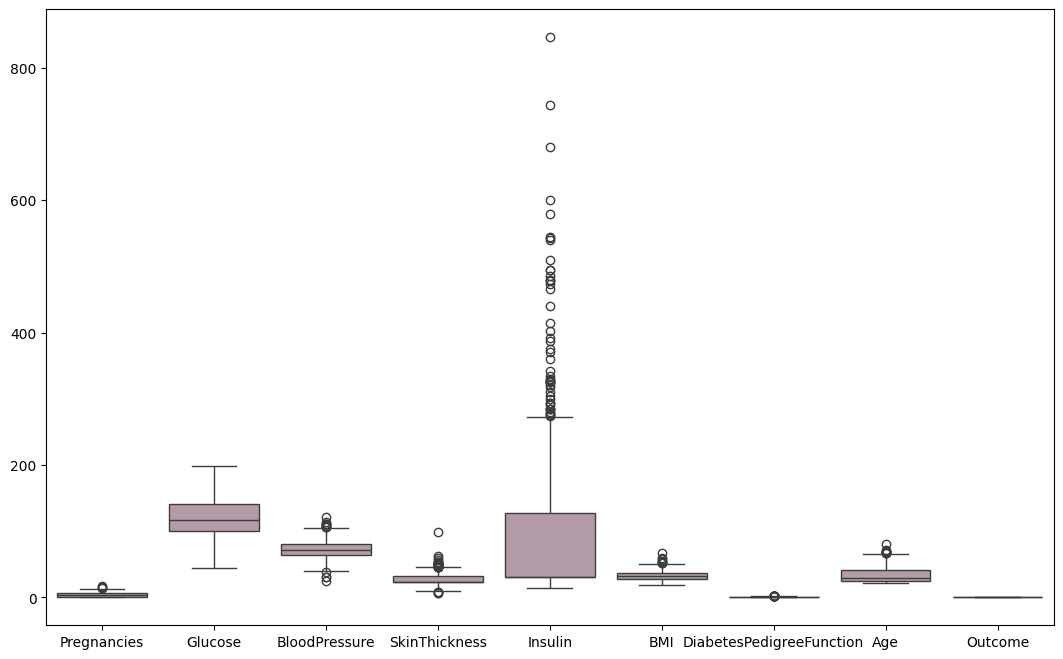

In [284]:
plt.figure(figsize=(13, 8))
sns.boxplot(df, color='#B798A7')
plt.show()

In [285]:
def replace_outliers_median(df, column):
    median = df[column].median()
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    df[column] = np.where((df[column] < lower) | (df[column] > upper), median, df[column])
    return df

In [286]:
cols = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Insulin'

]
for column in cols:
    if column in df.columns:
        df = replace_outliers_median(df, column)

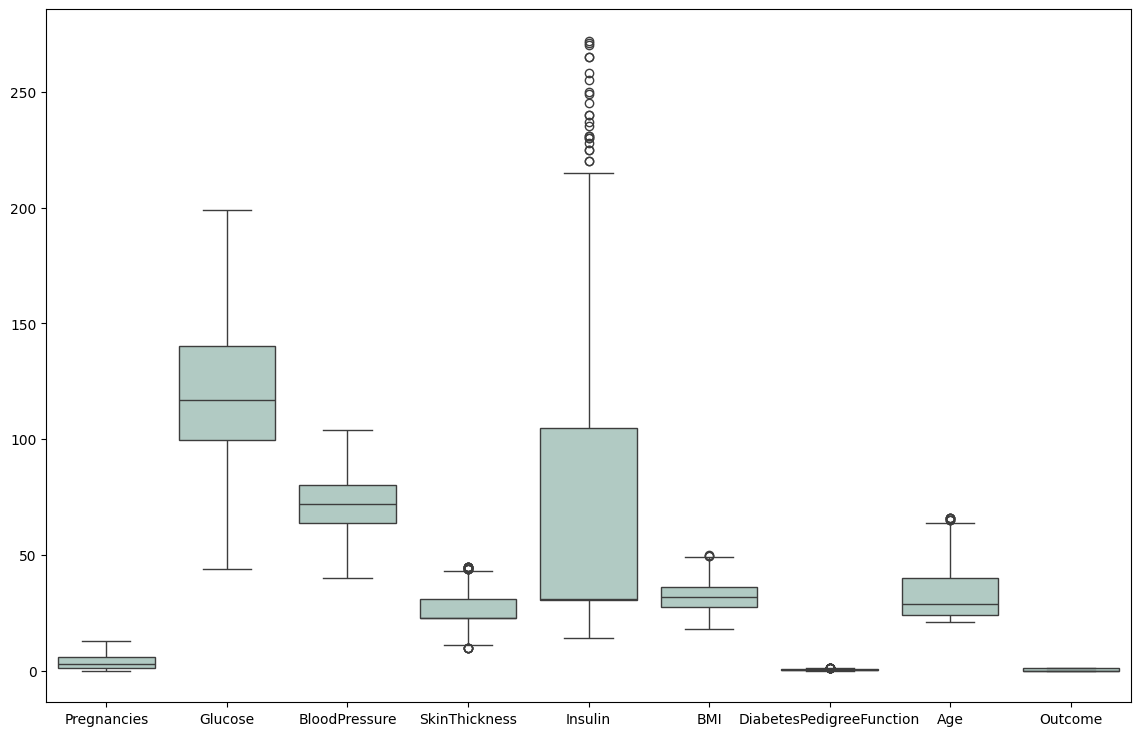

In [287]:
plt.figure(figsize=(14, 9))
sns.boxplot(df, color='#adcec5')
plt.show()

In [288]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.656250,72.108073,26.278646,70.755534,32.198958,0.427667,32.760417,0.348958
std,3.270644,30.438286,10.874178,7.493445,59.661471,6.410558,0.245162,11.055385,0.476951
min,0.000000,44.000000,40.000000,10.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.875000,32.000000,0.371750,29.000000,0.000000
75%,6.000000,140.250000,80.000000,31.000000,105.000000,36.300000,0.582250,40.000000,1.000000
max,13.000000,199.000000,104.000000,45.000000,272.000000,50.000000,1.191000,66.000000,1.000000


## EDA

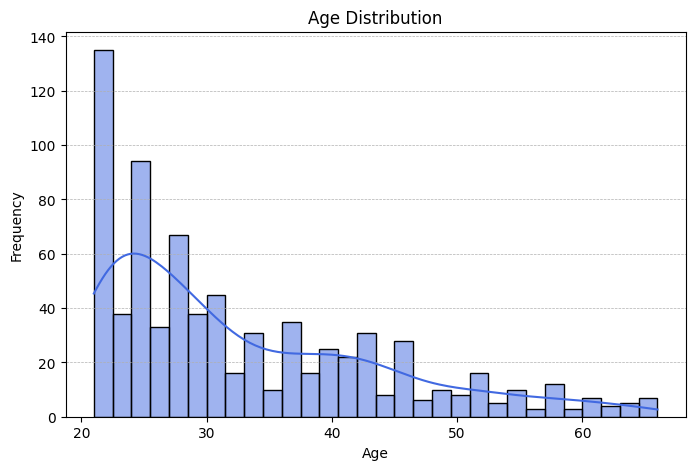

In [289]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='royalblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

Text(0.5, 1.02, 'Count of TARGET Variable per category')

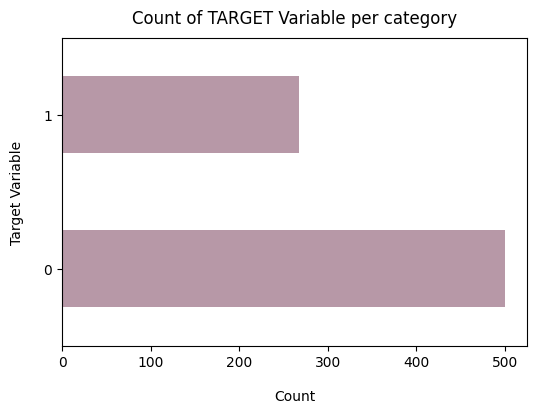

In [290]:
df['Outcome'].value_counts().plot(kind='barh', color="#B798A7", figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [291]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [292]:
for column in df.columns:
    print(f'{column} =>', df[column].value_counts().shape)

Pregnancies => (14,)
Glucose => (135,)
BloodPressure => (38,)
SkinThickness => (36,)
Insulin => (144,)
BMI => (240,)
DiabetesPedigreeFunction => (490,)
Age => (46,)
Outcome => (2,)


- we can group the data into 5 bins.
- Binning these values will simplify the analysis and enhance the clarity of data visualization

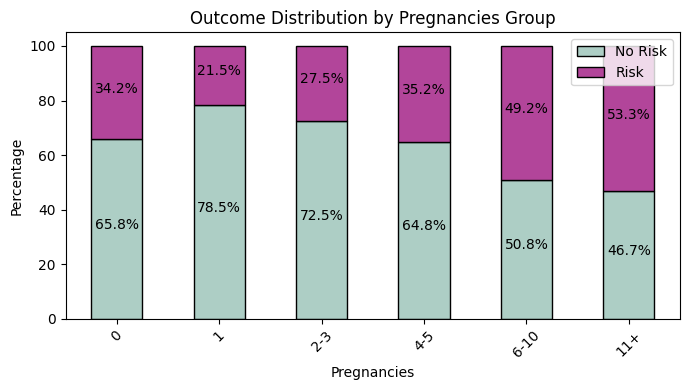

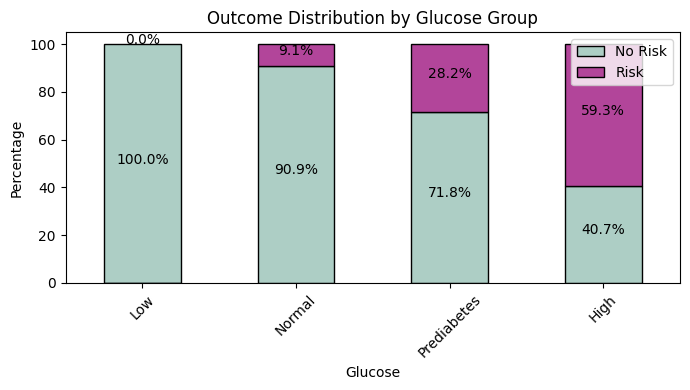

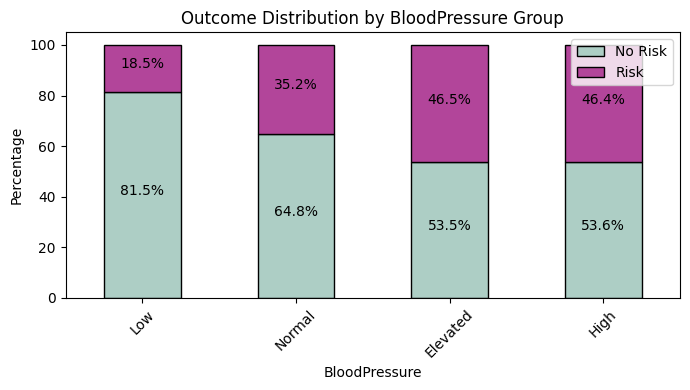

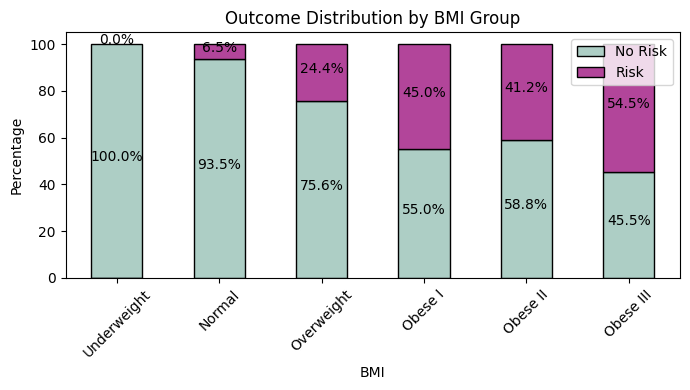

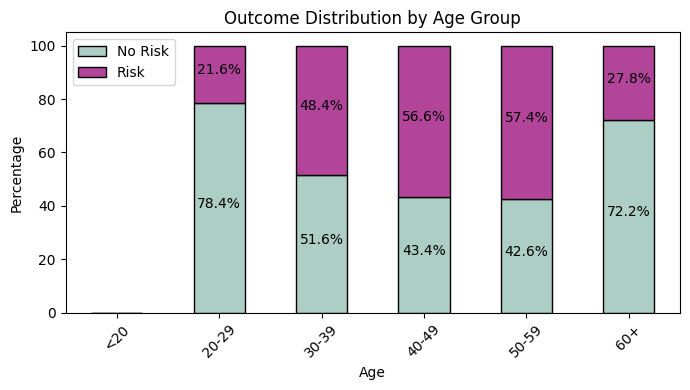

In [293]:
bins_pregnancies = [-1, 0, 1, 3, 5, 10, 15]
labels_pregnancies = ['0', '1', '2-3', '4-5', '6-10', '11+']
df['Pregnancies_Binned'] = pd.cut(df['Pregnancies'], bins=bins_pregnancies, labels=labels_pregnancies)

bins_glucose = [0, 70, 100, 125, 200]
labels_glucose = ['Low', 'Normal', 'Prediabetes', 'High']
df['Glucose_Binned'] = pd.cut(df['Glucose'], bins=bins_glucose, labels=labels_glucose)

bins_bp = [0, 60, 80, 90, 120]
labels_bp = ['Low', 'Normal', 'Elevated', 'High']
df['BloodPressure_Binned'] = pd.cut(df['BloodPressure'], bins=bins_bp, labels=labels_bp)

bins_bmi = [0, 18.5, 25, 30, 35, 40, 100]
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
df['BMI_Binned'] = pd.cut(df['BMI'], bins=bins_bmi, labels=labels_bmi)

bins_age = [0, 20, 30, 40, 50, 60, 100]
labels_age = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['Age_Binned'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)


def plot_stacked_percentage(column_name):
  
    counts = df.groupby([column_name, 'Outcome']).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    

    fig, ax = plt.subplots(figsize=(7, 4))
    colors = ['#adcec5', '#B2459A'] 
    labels = ['No Risk', 'Risk']
    
    bars = percentages.plot(kind='bar', stacked=True, color=colors, ax=ax, edgecolor='black')
    
    for i, (no_risk, risk) in enumerate(zip(percentages[0], percentages[1])):
        ax.text(i, no_risk / 2, f'{no_risk:.1f}%', ha='center', color='black', fontsize=10)
        ax.text(i, no_risk + risk / 2, f'{risk:.1f}%', ha='center', color='black', fontsize=10)
    
    # تنسيق الرسم
    ax.set_ylabel('Percentage')
    ax.set_xlabel(column_name.replace('_Binned', ''))
    ax.set_title(f'Outcome Distribution by {column_name.replace("_Binned", "")} Group')
    ax.legend(labels)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

binned_columns = ['Pregnancies_Binned', 'Glucose_Binned', 'BloodPressure_Binned', 
                 'BMI_Binned', 'Age_Binned']

for column in binned_columns:
    plot_stacked_percentage(column)
    

In [294]:
df = df.drop(binned_columns, axis=1, errors='ignore')

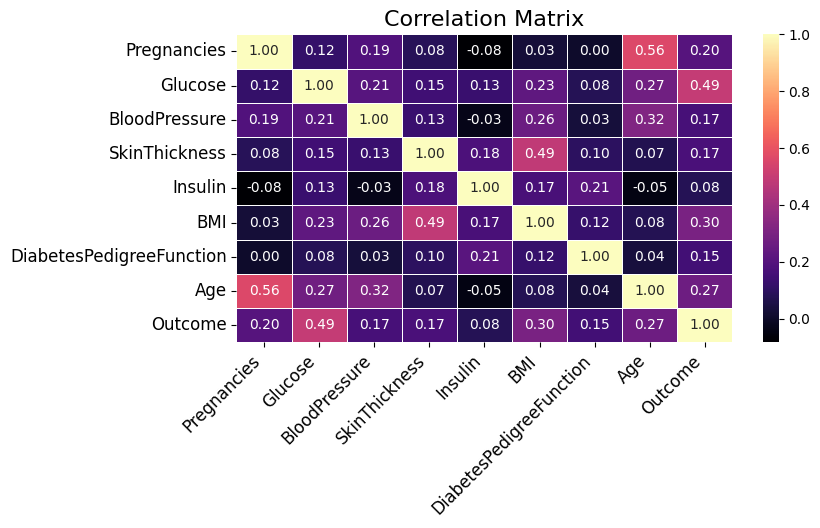

In [295]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 4))  
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)
plt.show()

- **Glucose (0.49)** has the highest correlation with diabetes.
- **BMI (0.30)** and **Age (0.27)** are also important factors.
- **Pregnancies (0.20)** shows some correlation with diabetes.
- **BMI & SkinThickness (0.49)** are strongly related.
- **Age & Pregnancies (0.56)** have a noticeable correlation.

## Create the model

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

split the data

In [297]:
x = df.drop('Outcome', axis=1) 
y = df['Outcome']  

Split the dataset into training and testing sets (80% train, 20% test)

In [298]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

 Feature scaling (important for Logistic Regression)

In [299]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the Logistic Regression model

In [300]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Evaluate the model

In [301]:
y_pred = model.predict(X_test)

In [302]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7403
Confusion Matrix:
[[79 20]
 [20 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [303]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)


print( grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


{'C': 1, 'solver': 'liblinear'}
Accuracy: 0.7403
Confusion Matrix:
[[79 20]
 [20 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

